# **Tugas 1**

Anggota Kelompok:
1. Michael Rich Kharisma - 2106724901
2. Kalisha Rahma Firza - 2106725053
3. Ricky - 2106724952
4. Kayla Adzka Amanda B. - 2106637662
5. Bob Rahman Hakim - 2106726863

In [ ]:
# Impor modul yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from spacy.lang.en.stop_words import STOP_WORDS as stop_words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from scipy.linalg import svd
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option("display.max_colwidth", 200)

#Case Study

The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups.

Bagaimana kita tahu topik apa yang dibicarakan dalam dokumen 20 Newsgroups tersebut? Mari lakukan implementasi topic modelling pada data tersebut.

#Load Data

In [ ]:
# Load data
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [ ]:
# Melihat dataset
documents[:2]

["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n",
 "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap

In [ ]:
# Melihat total dokumen
print("Total Documents: ", len(documents))

Total Documents:  11314


In [ ]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Dataset ini memiliki 11,314 text documents yang terdistribusikan dalam 20 newgroups yang berbeda.

# Preprocessing

In [ ]:
# Me-load data dari list ke datafame untuk processing lebih lanjut
news_df = pd.DataFrame({'document':documents})

# Menghapus semuanya selain alfabet dan menggantinya dengan space kosong
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

# Menghapus kata-kata pendek karena biasanya tidak penting
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Membuat semua tulisan menjadi lowercase untuk menghilangkan sensitivitas kasus
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
# tokenization - membagi kalimat menjadi kata-kata
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())

# menghilangkan stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization - Menggabung kata-kata untuk mendapatkan kembali kalimat
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

# Document-term Matrix

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # Menetapkan 1000 term teratas
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape # Mengecek bentuk dari matriks document-term

(11314, 1000)

# Topic Modeling

In [ ]:
# SVD merepresentasikan dokumen dan terms di vektor
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

20

In [ ]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ", end='', flush=True)
    for t in sorted_terms:
        print(t[0], end=' ', flush=True)
    print(" ")

Topic 0: like know people think good time thanks  
Topic 1: thanks windows card drive mail file advance  
Topic 2: game team year games season players good  
Topic 3: drive scsi hard disk card drives problem  
Topic 4: windows file window files program problem version  
Topic 5: government space chip mail information data encryption  
Topic 6: like bike chip sounds know looks look  
Topic 7: card sale video monitor offer price jesus  
Topic 8: know card chip video government people clipper  
Topic 9: good know time bike problem jesus work  
Topic 10: think good chip clipper need encryption people  
Topic 11: thanks problem right bike good window time  
Topic 12: good people windows know sale file files  
Topic 13: space think know nasa problem year israel  
Topic 14: space good card thanks people year nasa  
Topic 15: people problem game window time work want  
Topic 16: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


problem good window israel people know israeli  
Topic 17: file time problem need files mail game  
Topic 18: need right file card files want good  
Topic 19: need time windows want israel window israeli  


# Visualisasi

In [ ]:
X_topics = svd_model.fit_transform(X)
embedding = TSNE(n_components=2).fit_transform(X_topics)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


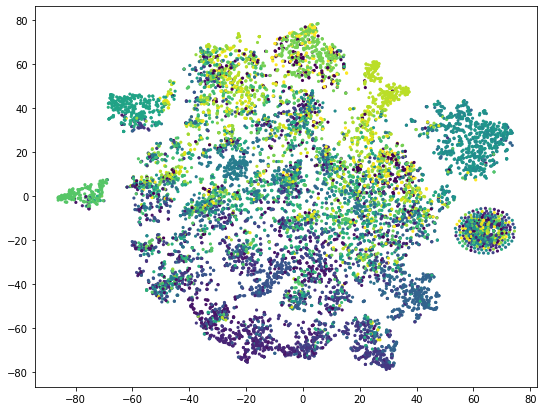

In [ ]:
# Visualisasi scatter plot
plt.figure(figsize=(9,7))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target,
s = 10, # size
edgecolor='none'
)
plt.show()

#Kesimpulan

Akan dicari tahu topik yang paling sering dibicarakan dalam dokumen 20 Newsgroup. Adapun langkah-langkah yang dilakukan adalah sebagai berikut:

- Mengimport modul yang dibutuhkan
- Preprocessing data, pada kali ini dilakukan data cleansing seperti menghapus huruf selain alfabet
- Dengan menggunakan SVD, didapatkan topik sebagai berikut: 

  Topic 0: like know people think good time thanks  
  Topic 1: thanks windows card drive mail file advance  
  Topic 2: game team year games season players good  
  Topic 3: drive scsi hard disk card drives problem  
  Topic 4: windows file window files program problem version  
  Topic 5: government space chip mail information data encryption  
  Topic 6: like bike chip sounds know looks look  
  Topic 7: card sale video monitor offer price jesus  
  Topic 8: know card chip video government people clipper  
  Topic 9: good know time bike problem jesus work  
  Topic 10: think good chip clipper need encryption people  
  Topic 11: thanks problem right bike good window time  
  Topic 12: good people windows know sale file files  
  Topic 13: space think know nasa problem year israel  
  Topic 14: space good card thanks people year nasa  
  Topic 15: people problem game window time work want  
  Topic 16: problem good window israel people know israeli  
  Topic 17: file time problem need files mail game  
  Topic 18: need right file card files want good  
  Topic 19: need time windows want israel window israeli
- Visualisasi data menggunakan scatter plot untuk memperlihatkan sebaran topik yang dibahas dalam dokumen 20 Newsgroup 